In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import os
import xml.etree.ElementTree as ET
%matplotlib inline

#### Our Data is in xml format so we need to process each line to get values from inside tags
-  readLines in python returns lines from file inside a list so it's a useful tool

In [2]:
readMe = open('sorted_data/books/positive.review','r').readlines() #read = r
for i in range(100):
    print(readMe[i])

<review>

<unique_id>

0375416811:founder_of_chick_lit:erin_oakes_"avid_reader"

</unique_id>

<unique_id>

1521

</unique_id>

<asin>

0375416811

</asin>

<product_name>

Bridget Jones Diary: Books: Helen Fielding,Tracie Bennett

</product_name>

<product_type>

books

</product_type>

<product_type>

books

</product_type>

<helpful>



</helpful>

<rating>

5.0

</rating>

<title>

Founder of chick lit

</title>

<date>

August 24, 2006

</date>

<reviewer>

Erin Oakes "avid reader"

</reviewer>

<reviewer_location>

Central PA

</reviewer_location>

<review_text>

Bridget Jones, modern day woman, brillant and doesn't know it, prone to accidents and mess ups but manages to come out of them.  



This is the book that started it all with the chick lit fever.  Bridget Jones is my hero! 

</review_text>

</review>

<review>

<unique_id>

188105201X:excellent_resource_for_principals!:onickre@mail.milwaukee.k12.wi.us

</unique_id>

<unique_id>

3294

</unique_id>

<asin>

188105201X

</

## 1000 + 1000 - : reviews on Amazon Books
-  in our directory we have 25 amazon products reviews we will work on labled files wihch are 2 files per product so we get a total of 50 xml file to process let's start with what amazon was first known for books ,inside the books directory we have neagatif.review and positive.review

In [3]:
BooksPositRev = open('sorted_data/books/positive.review','r').readlines() #read = r
BooksNegatRev = open('sorted_data/books/negative.review','r').readlines() #read = r
#print(BooksNegatRev)
#print(BooksPositRev)
print(BooksNegatRev.count('</review>\n'))
print(BooksPositRev.count('</review>\n'))

1000
1000


## parse xml file 
-  add each element from each review to the list ** Review **
-  add ** Review ** to the dictionary ** Reviews **

In [4]:
def Processing_XML_Reviews_Dictionnaire(ListReviews):
    count = 0
    Review = []
    Reviews = {}
    for i in range(len(ListReviews)):
        if ListReviews[i] != '</review>\n':
            if ListReviews[i] == '<review>\n' and ListReviews[i+1] == '<unique_id>\n':
                # unique_id
                Review.append('unique_id/'+ListReviews[i+2])
            #if ListReviews[i] == '</unique_id>\n' and ListReviews[i+1] == '<unique_id>\n':
                #unique_idN
                #Review.append('unique_id/'+ListReviews[i+2])
            if  ListReviews[i] == '<asin>\n':
                #asin
                Review.append('asin/'+ListReviews[i+1])    
            if  ListReviews[i] == '<product_name>\n':
                #productName
                Review.append('product_name/'+ListReviews[i+1])
            #if  ListReviews[i] == '</product_type>\n' and ListReviews[i+1] == '<product_type>\n' :
                #here we append the producttype
                #Review.append('product_type/'+ListReviews[i+2])
            if ListReviews[i] == '<helpful>\n':
                #helpful
                Review.append('helpful/'+ListReviews[i+1])
            if ListReviews[i] == '<rating>\n':
                Review.append('rating/'+ListReviews[i+1])
            if ListReviews[i] == '<title>\n':
                Review.append('title/'+ListReviews[i+1])
            if ListReviews[i] == '<date>\n':
                Review.append('date/'+ListReviews[i+1])
            if ListReviews[i] == '<reviewer>\n':
                Review.append('reviewer/'+ListReviews[i+1])
            if ListReviews[i] == '<reviewer_location>\n':
                Review.append('reviewer_location/'+ListReviews[i+1])
            if ListReviews[i] == '<review_text>\n':
                Review.append('review_text/'+ListReviews[i+1])
        elif ListReviews[i] == '</review>\n':
            count = count + 1
            r = 'review'+ str(count) 
            Reviews[r] = Review
            #nfargou list
            Review = []
    return Reviews



In [5]:
NegRev_Dict = Processing_XML_Reviews_Dictionnaire(BooksNegatRev)
posRev_Dict = Processing_XML_Reviews_Dictionnaire(BooksPositRev)
posRev_Dict['review1']

['unique_id/0375416811:founder_of_chick_lit:erin_oakes_"avid_reader"\n',
 'asin/0375416811\n',
 'product_name/Bridget Jones Diary: Books: Helen Fielding,Tracie Bennett\n',
 'helpful/\n',
 'rating/5.0\n',
 'title/Founder of chick lit\n',
 'date/August 24, 2006\n',
 'reviewer/Erin Oakes "avid reader"\n',
 'reviewer_location/Central PA\n',
 "review_text/Bridget Jones, modern day woman, brillant and doesn't know it, prone to accidents and mess ups but manages to come out of them.  \n"]

##  We Can See our Dictionnary formed we still have many things to clean

In [6]:
print(len(NegRev_Dict))
print(len(posRev_Dict))
NegRev_Dict['review852']



1000
1000


['unique_id/0134744799:useful_but_over_priced:"tseant"\n',
 'asin/0134744799\n',
 'product_name/International Accounting Second Edition: Books\n',
 'helpful/6 of 8\n',
 'rating/1.0\n',
 'title/Useful but over priced\n',
 'date/February 4, 2001\n',
 'reviewer/"tseant"\n',
 'reviewer_location/Tokyo, Japan (formerly Sydney, Australia\n',
 'review_text/A useful book that provides a good summary comparing differing Accounting Standards and approaches between countries.  However, it is not worth the price.  It is supposedly written for later year undergraduate and masters accounting students.  It is more suitable for general second year accounting students.  Plus, as I am working with a multinational European bank in Japan, the book is, rapidly becoming, out of date.  There is none of the simply but incisive commentary which can be found in other books about the differences and outcomes of general accounting principals drawn from different countries\n']

## Reviews from Dictionary to pandas dataframe
-  split() returns list of element splited from string

In [7]:
def Porcessing_Dictonnary_ToDataFrame(Dict):
    #on prepare notre dataframe pour les données
    df = pd.DataFrame(columns=['unique_id','asin','product_name','helpful','rating','title',
                    'date','reviewer','reviewer_location','review_text'])
    count = 0
    for i,k in Dict.items():
        df.loc[count] = [k[0].split("/")[1].split("\n")[0],k[1].split("/")[1].split("\n")[0]
                              ,k[2].split("/")[1].split("\n")[0],k[3].split("/")[1].split("\n")[0]
                              ,k[4].split("/")[1].split("\n")[0],k[5].split("/")[1].split("\n")[0]
                              ,k[6].split("/")[1].split("\n")[0],k[7].split("/")[1].split("\n")[0]
                              ,k[8].split("/")[1].split("\n")[0],k[9].split("/")[1].split("\n")[0]
        ]
        count = count + 1

    return df

In [26]:
BooksNeg = Porcessing_Dictonnary_ToDataFrame(NegRev_Dict)
BooksPos = Porcessing_Dictonnary_ToDataFrame(posRev_Dict)

## Finaly books dataframe is ready to further data preparation

In [27]:
BooksNeg.head(n=2)

,unique_id,asin,product_name,helpful,rating,title,date,reviewer,reviewer_location,review_text
0,0440225450:the_author_started_repeating_himsel...,0440225450,The Final Detail: Books: Harlan Coben,2 of 3,2.0,The author started repeating himself,"January 4, 2007","Fabiola Queiroz ""Fabiola""","São Paulo, Brasil","After reading all the author's books so far, i..."
1,0060823879:dreadfully_boring:prairie_pal,0060823879,A Crack in the Edge of the World CD: America a...,4 of 5,2.0,Dreadfully Boring,"April 28, 2006",Prairie Pal,"Winnipeg, Canada",How can a best-selling author like Simon Winch...


In [10]:
BooksPos.head(n=2)

,unique_id,asin,product_name,helpful,rating,title,date,reviewer,reviewer_location,review_text
0,0875523587:very_encouraging_and_enlightening...:,0875523587,"Your Family, God's Way: Developing and Sustain...",8 of 9,5.0,Very encouraging and enlightening...,"March 13, 1999",,,The author gave many thorough and enlightening...
1,0785264817:zig_is_the_grandfather_of_sales_ski...,0785264817,Selling 101: What Every Successful Sales Profe...,5 of 6,5.0,Zig is the grandfather of sales skills,"March 15, 2005","Todd B. Natenberg ""Author, 'I just got a job i...","Chicago, IL United States",Zig Ziglar has done it again. As an author mys...


## Now We Loop over all our file
- apparel/negative.review	1000
- apparel/positive.review1000
- automotive/negative.review	152
- automotive/positive.review	584
- baby/negative.review	900
- baby/positive.review	1000
- beauty/negative.review	493
- beauty/positive.review	1000
- books/negative.review	1000
- books/positive.review	1000
- camera & photo/negative.review	999
- camera & photo/positive.review	1000
- cell phones & service/negative.review	384
- cell phones & service/positive.review	639
- computer & video games/negative.review	458
- computer & video games/positive.review	1000
- dvd/negative.review	1000
- dvd/positive.review	1000
- electronics/negative.review	1000
- electronics/positive.review	1000
- gourmet food/negative.review	208
- gourmet food/positive.review	1000
- grocery/negative.review	352
- grocery/positive.review	1000
- health & personal care/negative.review	1000
- health & personal care/positive.review	1000
- jewelry & watches/negative.review	292
- jewelry & watches/positive.review	1000
- kitchen & housewares/negative.review	1000
- kitchen & housewares/positive.review	1000
- magazines/negative.review	970
- magazines/positive.review	1000
- music/negative.review		1000
- music/positive.review		1000
- musical instruments/negative.review	48
- musical instruments/positive.review	284
- office products/negative.review	64
- office products/positive.review	367
- outdoor living/negative.review	327
- outdoor living/positive.review	1000
- software/negative.review	915
- software/positive.review	1000
- sports & outdoors/negative.review	1000
- sports & outdoors/positive.review	1000
- tools & hardware/negative.review	14
- tools & hardware/positive.review	98
- toys & games/negative.review	1000
- toys & games/positive.review	1000
- video/negative.review	1000
- video/positive.review	1000

In [11]:
import os
indir = 'sorted_data/'
PositifReviews = []
NegativeReviews = []
for root, dirs, filenames in os.walk(indir):
    #print(root,dirs,filenames)
    for f in filenames:
        #log = open(os.path.join(root, f), 'r').readlines()
        #print(os.path.join(root, f))
        #filee = open(log,'r').readlines()
        if f == "positive.review":
            log = open(os.path.join(root, f), 'r').readlines()
            PositifReviews.append(Processing_XML_Reviews_Dictionnaire(log))
            #print(log)
            print(os.path.join(root, f))
        if f == "negative.review":
            log = open(os.path.join(root, f), 'r').readlines()
            NegativeReviews.append(Processing_XML_Reviews_Dictionnaire(log))
            #print(log)
            print(os.path.join(root, f))



sorted_data/apparel\negative.review
sorted_data/apparel\positive.review
sorted_data/automotive\negative.review
sorted_data/automotive\positive.review
sorted_data/baby\negative.review
sorted_data/baby\positive.review
sorted_data/beauty\negative.review
sorted_data/beauty\positive.review
sorted_data/books\negative.review
sorted_data/books\positive.review
sorted_data/cameraPhoto\negative.review
sorted_data/cameraPhoto\positive.review
sorted_data/cellPhonesService\negative.review
sorted_data/cellPhonesService\positive.review
sorted_data/computerVideoGames\negative.review
sorted_data/computerVideoGames\positive.review
sorted_data/dvd\negative.review
sorted_data/dvd\positive.review
sorted_data/electronics\negative.review
sorted_data/electronics\positive.review
sorted_data/gourmet_food\negative.review
sorted_data/gourmet_food\positive.review
sorted_data/grocery\negative.review
sorted_data/grocery\positive.review
sorted_data/healthPersonalCare\negative.review
sorted_data/healthPersonalCare\posi

## 24 other products were added to our list plus the books from before we will have 25 product reviews
-  with this multitude of areas we try to get more information about the vocabulary used with different products and with this approch we get to build  a big dictionnary of words 
-  after checking with the number of reviews in our documentation we didn't miss anything the numbers match 

In [12]:
print(len(PositifReviews))
print(len(NegativeReviews))
print(len(PositifReviews[1]))# automotive/positive.review	 584
print(len(PositifReviews[2]))#baby/positive.review		1000

25
25
584
1000


## We get a very large Dataframe


In [13]:
df_24_Postif = pd.DataFrame(columns=['unique_id','asin','product_name','helpful','rating','title',
                    'date','reviewer','reviewer_location','review_text'])
df_24_Negatif = pd.DataFrame(columns=['unique_id','asin','product_name','helpful','rating','title',
                    'date','reviewer','reviewer_location','review_text'])
df = pd.DataFrame()

for Rev in PositifReviews:
    print(Rev['review1'])
    df = Porcessing_Dictonnary_ToDataFrame(Rev)
    #print(len(df))
    #print(df.head(n=2))
    df_24_Postif = pd.concat([df_24_Postif, df])
    df.empty

['unique_id/B0007QCQA4:good_sneakers:christopher_w._damico_"macman"\n', 'asin/B0007QCQA4\n', "product_name/adidas Originals Men's Superstar II Basketball Shoe: Apparel\n", 'helpful/0 of 1\n', 'rating/4.0\n', 'title/GOOD SNEAKERS\n', 'date/July 15, 2006\n', 'reviewer/Christopher W. Damico "MACMAN"\n', 'reviewer_location/NYC\n', "review_text/GOOD LOOKING KICKS IF YOUR KICKIN IT OLD SCHOOL LIKE ME. AND COMFORTABLE. AND RELATIVELY CHEAP. I'LL ALWAYS KEEP A PAIR OF STAN SMITH'S AROUND FOR WEEKENDS\n"]
['unique_id/B0009N4F6I:works_very_well:i_have_9_cats\n', 'asin/B0009N4F6I\n', 'product_name/Wedgie Cup Holder: Automotive\n', 'helpful/1 of 1\n', 'rating/5.0\n', 'title/Works very well\n', 'date/August 19, 2006\n', 'reviewer/I have 9 cats\n', 'reviewer_location/Dela where?\n', "review_text/I bought one today for my Mazda Tribute because I didn't like the built-in cup holders. It's actually very sturdy and fits very well.\n"]
['unique_id/B0002U1SFE:love_it!:a._kurczewski\n', 'asin/B0002U1SFE\n'

['unique_id/B000EX8N3E:outstanding_in_almost_every_way:b._siao\n', 'asin/B000EX8N3E\n', "product_name/Casio Men's G-Shock Atomic Solar Watch # MTG920DA-1: Jewelry & Watches: Casio\n", 'helpful/\n', 'rating/5.0\n', 'title/Outstanding In Almost Every Way\n', 'date/November 9, 2006\n', 'reviewer/B. Siao\n', 'reviewer_location/San Diego, CA\n', 'review_text/Elegant yet tough, this particular Casio has a metal bracelet and is extremely comfortable to wear.  The display is sharp, clear, and very easy to read.  I only wish it had a thermometer.  The watch is big and looks very macho on your wrist\n']
['unique_id/B0002D31QU:immediate_results!:a._sanford\n', 'asin/B0002D31QU\n', 'product_name/Premier Gentle Spray Anti-Bark Dog Collar: Kitchen & Housewares\n', 'helpful/1 of 1\n', 'rating/5.0\n', 'title/Immediate results!\n', 'date/October 24, 2006\n', 'reviewer/A. Sanford\n', 'reviewer_location/Blacksburg, VA USA\n', "review_text/My grandma's 10 year old Yorkie just would never shut up.  He bark

In [14]:
df1 = pd.DataFrame()
for Rev in NegativeReviews:
    #print(Reviews['review1'])
    df1 = Porcessing_Dictonnary_ToDataFrame(Rev)
    #print(len(df))
    #print(df.head(n=2))
    df_24_Negatif = pd.concat([df_24_Negatif, df1])
    df1.empty

In [23]:
print(len(df_24_Postif))
print(len(df_24_Negatif))
df_24_Postif.describe()
df_24_Negatif.describe()

21972
16576


,unique_id,asin,product_name,helpful,rating,title,date,reviewer,reviewer_location,review_text,Class
count,16576,16576,16576,16576,16576,16576,16576,16576,16576,16576,16576
unique,15442,10905,10760,908,2,13359,1664,13427,5730,14661,1
top,"B0000AFQQU:this_is_a_big,_glossy_brochure_for_...",B00099QAQK,TIME [6-month subscription] [with $5 Bonus]: M...,,1.0,Disappointed,"January 9, 2007",,,,neg
freq,4,18,20,2748,10443,78,216,452,3572,61,16576


## finally We got
-  21972 positive reviews on 25 products
-  16576 negatif reviews on 25 products

In [24]:
df_24_Postif['Class'] = "pos" # review positives
df_24_Negatif['Class'] = "neg" #review Negatif
Reviews  = pd.concat([df_24_Postif,df_24_Negatif])
Reviews.drop('unique_id',axis=1,inplace=True)

## Unique_id Has the same information as "asin" "title" "reviewer" so we can eliminate it
-  exp : ['1584884339', 'outstanding', 'k._kalantar-zadeh_"kkz"']
-  BooksReviews is the dataframe that features 2000 reviews on books 1000+ 1000- I want to keep it apart to test on this subset and thus gain compute time compare to 25 product and 50000 reviews


In [28]:
BooksPos.drop('unique_id',axis=1,inplace=True)
BooksNeg.drop('unique_id',axis=1,inplace=True)

In [29]:
BooksPos['Class'] = "pos" # review positives
BooksNeg['Class'] = "neg" #review Negatif
BooksReviews = pd.concat([BooksPos,BooksNeg])

In [30]:
Reviews.head(n=2)

,asin,product_name,helpful,rating,title,date,reviewer,reviewer_location,review_text,Class
0,B0009PG35M,ASICS&#174; Men's GEL-Nimbus&#174; VII: Apparel,5 of 5,5.0,Never buying Nike Running Shoes again,"March 17, 2006",Shanik,,"Seriously, went into the store to find new run...",pos
1,B0009OTGE8,Bill Blass Men's Dress Shirt with Fashion Poin...,,5.0,Bill Blass shirts,"March 2, 2006",Richard H. Pontone,"Brooklyn,NY",The shirts are what I had asked for. They are...,pos


In [31]:
Reviews.iloc[0,8]

"Seriously, went into the store to find new running shoes, possibly the air 360.  Was wearing shoxs in the store.  Threw them away immediately.  These are the best shoes I've worn in a long while.  I'm one of those ppl that like to take off my shoes as soon as I get home.  I forgot that these were on, they were that comfortable.  I'm a heavy, parttime runner.  Nothing over 5K as I am just starting again.  They support my weight extremely well"

## NLTK natural language Tool Kit
- NLTK is a leading platform for building Python programs to work with human language data(NLP)
- with **word_tokenize** we can extract the words from the text
- with **sent_tokenize** we can extract the sentences from the text

In [32]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer


#nltk.download()
#nltk.download('punkt')
def tokenize_words_Sents(Sent):
    return word_tokenize(Sent),sent_tokenize(Sent)
def tokenize_words(Sent):
    return word_tokenize(Sent)   
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

Words,Sents = tokenize_words_Sents(Reviews.iloc[0,8])
print("Words ",Words)
print("Sents ",Sents)

Words  ['Seriously', ',', 'went', 'into', 'the', 'store', 'to', 'find', 'new', 'running', 'shoes', ',', 'possibly', 'the', 'air', '360', '.', 'Was', 'wearing', 'shoxs', 'in', 'the', 'store', '.', 'Threw', 'them', 'away', 'immediately', '.', 'These', 'are', 'the', 'best', 'shoes', 'I', "'ve", 'worn', 'in', 'a', 'long', 'while', '.', 'I', "'m", 'one', 'of', 'those', 'ppl', 'that', 'like', 'to', 'take', 'off', 'my', 'shoes', 'as', 'soon', 'as', 'I', 'get', 'home', '.', 'I', 'forgot', 'that', 'these', 'were', 'on', ',', 'they', 'were', 'that', 'comfortable', '.', 'I', "'m", 'a', 'heavy', ',', 'parttime', 'runner', '.', 'Nothing', 'over', '5K', 'as', 'I', 'am', 'just', 'starting', 'again', '.', 'They', 'support', 'my', 'weight', 'extremely', 'well']
Sents  ['Seriously, went into the store to find new running shoes, possibly the air 360.', 'Was wearing shoxs in the store.', 'Threw them away immediately.', "These are the best shoes I've worn in a long while.", "I'm one of those ppl that like 

## Stop Words : usless words that we need to eliminate
-  NLTk offers English most popular StopWords with **stop_Words**

In [33]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
def Eliminate_Stop_Words(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return stop_words,filtered_words

def Eliminate_Stop_Word(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return filtered_words

stop_words,filtered_words = Eliminate_Stop_Words(Words)
print(stop_words)
print("------------------Words ------------------------")
print(Words)
print("------------------Words filltred---------------------")
print(filtered_words)

{"wasn't", 'than', 'the', 'theirs', 's', "it's", 'as', 'what', 'doing', 'our', 'ain', 'these', 'wouldn', 'yourself', 'weren', "mightn't", "hadn't", "you'll", 'his', 'won', 'against', 'd', 'but', 'they', 't', 'ourselves', 'nor', 'we', 'just', 'him', 'then', 're', 'for', 'doesn', 'here', 'were', 'of', 'itself', 'wasn', 'them', 'couldn', "needn't", 'when', 'needn', "that'll", 'should', 'and', 'ours', 'which', 'between', "shouldn't", 'those', 'or', 'all', 'has', "shan't", 'why', 'ma', 'isn', 'shan', "won't", 'been', 'have', 'where', 'did', 'both', 'now', 'am', "aren't", 'can', "you've", 'themselves', 'will', 'any', 'who', 'hers', 'an', "doesn't", 'it', "haven't", "you'd", 'down', 'during', 'most', 'from', 'there', 'other', 'myself', 'to', 'not', 'too', 'only', 'each', 'aren', 'more', 'by', 'on', 'about', 'such', 'yourselves', "isn't", 'being', 'own', 'i', 'y', 'does', 'same', 'so', 'haven', 'above', 'off', 'mustn', 'until', 'while', 'whom', "hasn't", 'again', 'under', 'hadn', 'herself', 't

## Stop Words Cloud

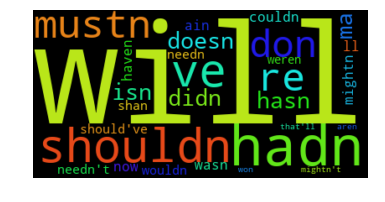

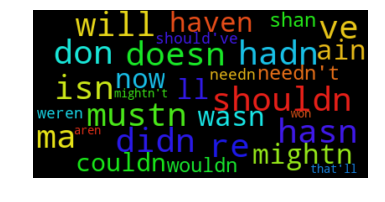

In [34]:

from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(stop_words))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(stop_words))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Stemming is the standardization in the NLP
- we try to eliminate all charcters at the end of each word 'ing' 'ed' 'er' to gain in computational because the meaning does not change if we eliminate them we gain in Computational Efficiency : 
- example :
- python
- pythoning
- pythoner
- ext ..
- so with the stemming we gain in computation

In [35]:
from nltk.stem import PorterStemmer
def Stemming_Words(Words):
    Ps = PorterStemmer()
    Stemmed_Words = []
    for m in Words:
        Stemmed_Words.append(Ps.stem(m))
    return Stemmed_Words
Stemmed_Words = Stemming_Words(filtered_words)
print(Stemmed_Words)

['serious', ',', 'went', 'store', 'find', 'new', 'run', 'shoe', ',', 'possibl', 'air', '360', '.', 'wa', 'wear', 'shox', 'store', '.', 'threw', 'away', 'immedi', '.', 'these', 'best', 'shoe', 'I', "'ve", 'worn', 'long', '.', 'I', "'m", 'one', 'ppl', 'like', 'take', 'shoe', 'soon', 'I', 'get', 'home', '.', 'I', 'forgot', ',', 'comfort', '.', 'I', "'m", 'heavi', ',', 'parttim', 'runner', '.', 'noth', '5K', 'I', 'start', '.', 'they', 'support', 'weight', 'extrem', 'well']


## Lemmatizing is like the Stemming
- Instead of returning the same words with the last characters removed, it returns the root of the word or another word synonymous so the returns are true English words


In [36]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
def Lemmatizing_Words(Words):
    Lm = WordNetLemmatizer()
    Lemmatized_Words = []
    for m in Words:
        Lemmatized_Words.append(Lm.lemmatize(m))
    return Lemmatized_Words

Lemmatized_Words = Lemmatizing_Words(filtered_words)
print(Lemmatized_Words)

['Seriously', ',', 'went', 'store', 'find', 'new', 'running', 'shoe', ',', 'possibly', 'air', '360', '.', 'Was', 'wearing', 'shoxs', 'store', '.', 'Threw', 'away', 'immediately', '.', 'These', 'best', 'shoe', 'I', "'ve", 'worn', 'long', '.', 'I', "'m", 'one', 'ppl', 'like', 'take', 'shoe', 'soon', 'I', 'get', 'home', '.', 'I', 'forgot', ',', 'comfortable', '.', 'I', "'m", 'heavy', ',', 'parttime', 'runner', '.', 'Nothing', '5K', 'I', 'starting', '.', 'They', 'support', 'weight', 'extremely', 'well']


In [37]:
#GEt words from Review_text m3neha Tokenize 
#RegExpTokenizer to get rid of ponctuation
ListWords =  [RegExpTokenizer(m) for m in list(Reviews['review_text'])]
print(ListWords[1])
#Eliminate Stop_Words
ListWords =  [Eliminate_Stop_Word(m) for m in ListWords]
print(ListWords[1])
#Stemming
ListWords = [Lemmatizing_Words(m) for m in ListWords]
print(ListWords[1])


['The', 'shirts', 'are', 'what', 'I', 'had', 'asked', 'for', 'They', 'are', 'sturdy', 'and', 'well', 'made', 'I', 'would', 'buy', 'more', 'if', 'I', 'needed', 'more', 'Well', 'worth', 'the', 'money', 'spen']
['The', 'shirts', 'I', 'asked', 'They', 'sturdy', 'well', 'made', 'I', 'would', 'buy', 'I', 'needed', 'Well', 'worth', 'money', 'spen']
['The', 'shirt', 'I', 'asked', 'They', 'sturdy', 'well', 'made', 'I', 'would', 'buy', 'I', 'needed', 'Well', 'worth', 'money', 'spen']


## Most redandent and important words

In [38]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words = FreqDist(all_words)
    #print(all_words.most_common(300))
    #print(len(all_words.keys()))
    return all_words

## 48943 words in all reviews

Combien de Mots !!! 48943


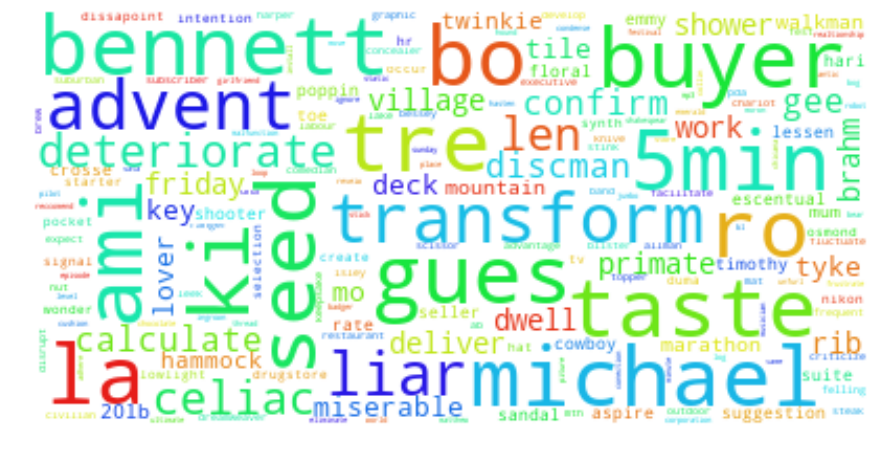

In [39]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Combien de Mots !!!",len(all_words))

## Ploting most important words
-  most commen words in all_words

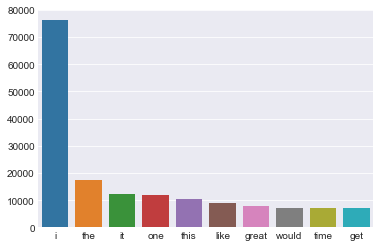

In [40]:
import seaborn as sns
# visualize food data
from sklearn.manifold import TSNE
all_words = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

## eliminate irrelevent Words
-  i the,it,get are words that are not filltered by our Stop_Words so we need to handle them
-  Delete words that are =>3 letters because generaly they are Pronouns and don't add to the sentiment of the text

In [41]:
#ListWords To lower case
def eliminate_irrelevent_Words(ListWords):
    ListWords1 = [] 
    for m in ListWords:
        l = [item.lower() for item in m]
        ListWords1.append(l)
    ListWords = ListWords1
    #print(ListWords)
    #elimnate words
    for m in ListWords:
        for w in m:
            if len(w) <=3:
                m.remove(w)
            if w == 'this':
                m.remove(w)
    return ListWords
def eliminate_irrelevent_Word(Word):
    #print(ListWords)
    #elimnate words
    Word = RegExpTokenizer(Word)
    Word = [item.lower() for item in Word]
    for m in Word:
        if len(m) <=3:
            Word.remove(m)
        if m == 'this':
            Word.remove(m)
    return Word

## After processing

All Words length  46350


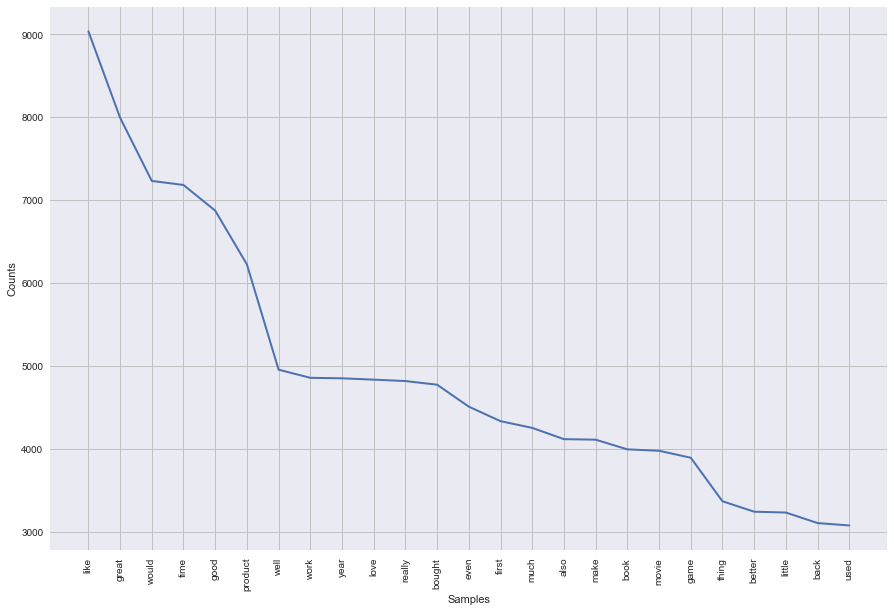

In [43]:
# Figures inline and set visualization style
ListWords = eliminate_irrelevent_Words(ListWords)
all_words = Bag_Of_Words(ListWords)
print("All Words length ",len(all_words))
%matplotlib inline
sns.set()
ax = plt.figure(figsize=(15,10))# Create freq dist and plot
freqdist1 = FreqDist(all_words)
freqdist1.plot(25)

### Creation of documents
-  Document is a tuple why i like Tuples:
-  Tuples are fixed size in nature whereas lists are dynamic.In other words, a tuple is immutable whereas a list is mutable.
- You can't add elements to a tuple. Tuples have no append or extend method.
- You can't remove elements from a tuple. Tuples have no remove or pop method.
- You can find elements in a tuple, since this doesn’t change the tuple.
- You can also use the in operator to check if an element exists in the tuple.

- **Tuples are faster** than lists. If you're defining a constant set of values and all you're ever going to do with it is iterate through it, use a tuple instead of a list.

In [44]:
import random
def Create_Document(Reviews,ListWords):
    ListClass = list(Reviews['Class'])
    Documents =  []
    for m in range(len(ListWords)):
        Documents.append((ListWords[m],ListClass[m]))
    print(Documents[0])
    #shuffle
    random.shuffle(Documents)
    return Documents
#on va utiliser Reviews Books
Documents = Create_Document(Reviews,ListWords)


(['seriously', 'went', 'store', 'find', 'running', 'shoe', 'possibly', 'wearing', 'shoxs', 'store', 'threw', 'away', 'immediately', 'these', 'best', 'shoe', 'worn', 'long', 'like', 'take', 'shoe', 'soon', 'home', 'forgot', 'comfortable', 'heavy', 'parttime', 'runner', 'nothing', 'starting', 'they', 'support', 'weight', 'extremely', 'well'], 'pos')


## find features
-  return a dictionary with the words as key and existence ** True ** ** false **  in our dictionary of words ** Most_Comm_Word **  as value
- 100 it's a parameter that can be modified which represents the 100 most repeated words
- ['im', 'road', 'going', 'to', 'tunisia', 'problem']
{'could': False, 'problem': True, 'amazon': False, 'time': False, 'product': False, 'they': False, 'star': False .......


In [50]:
def find_features(document,all_words,nbr_word):
    Most_Comm_Word = []    
    for w in all_words.most_common(nbr_word):
        Most_Comm_Word.append(w[0])

    word_features = Most_Comm_Word
    words = RegExpTokenizer(document)
    #print(words)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features
print(find_features('im road going to tunisia .',all_words,100))

{'small': False, 'need': False, 'every': False, 'used': False, 'better': False, 'time': False, 'could': False, 'many': False, 'however': False, 'battery': False, 'keep': False, 'purchased': False, 'book': False, 'quot': False, 'look': False, 'hard': False, 'easy': False, 'watch': False, 'work': False, 'problem': False, 'back': False, 'love': False, 'nice': False, 'something': False, 'film': False, 'well': False, 'around': False, 'year': False, 'like': False, 'want': False, 'they': False, 'going': True, 'last': False, 'first': False, 'worth': False, 'without': False, 'good': False, 'sound': False, 'feel': False, 'still': False, 'different': False, 'much': False, 'would': False, 'month': False, 'right': False, 'when': False, 'bought': False, 'music': False, 'phone': False, 'another': False, 'made': False, 'since': False, 'light': False, 'come': False, 'week': False, 'though': False, 'really': False, 'product': False, 'even': False, 'enough': False, 'people': False, 'thought': False, 'tak

In [51]:
import pickle
def Pickle_Save_Classifer(classifier,Test_Set):
    Classifier_o = open('NaiveBayes Score Model :'+str(nltk.classify.accuracy(classifier, Test_Set)*100)+'.pickle','wb')
    classifier = pickle.load(Classifier_o)
    Classifier_o.close()
    return classifier

In [52]:
def Pickle_open_Classifer(path):
    SaveClassifier = open(path,'rb')
    pickle.dump(classifier,SaveClassifier)
    SaveClassifier.close()

In [53]:
def Features_Set(all_words,Documents,nbr_word):
    #list(all_words.keys())[:1000]
    #featuresets = [(find_features(rev), category) for (rev, category) in Documents]
    featuresets = []
    for rev,cat in Documents:
        #print(' '.join(rev),cat)
        feature = find_features(' '.join(rev),all_words,nbr_word)
        #print(feature)
        featuresets.append((feature,cat))
    return featuresets

In [54]:
featuresets = Features_Set(all_words,Documents,100)

In [55]:
from sklearn.model_selection import train_test_split
Train_Set, Test_Set = train_test_split(featuresets, test_size=0.33, random_state=42)
print(Train_Set[26])

({'small': False, 'need': False, 'every': False, 'used': False, 'better': False, 'time': False, 'could': False, 'many': False, 'however': False, 'battery': False, 'keep': False, 'purchased': False, 'book': False, 'quot': False, 'look': False, 'hard': False, 'easy': False, 'watch': False, 'work': True, 'problem': False, 'back': False, 'love': False, 'nice': False, 'something': False, 'film': False, 'well': False, 'around': False, 'year': False, 'like': False, 'want': False, 'they': False, 'going': False, 'last': False, 'first': False, 'worth': False, 'without': False, 'good': False, 'sound': False, 'feel': False, 'still': False, 'different': False, 'much': False, 'would': False, 'month': False, 'right': False, 'when': False, 'bought': False, 'music': False, 'phone': False, 'another': False, 'made': False, 'since': False, 'light': False, 'come': False, 'week': False, 'though': False, 'really': False, 'product': True, 'even': False, 'enough': False, 'people': False, 'thought': False, 'tak

## Save our DataFrame and Featureset in csv because it took too much times to generate
-  we can use pickle

In [56]:
with open("FeaturesSet100Words.pql", "wb") as fp:   #Pickling
    pickle.dump(featuresets, fp)

Reviews.to_csv("Reviews.csv", sep='\t', encoding='utf-8')


**pickle works fine**

In [57]:
with open("FeaturesSet100Words.pql", "rb") as fp:   # Unpickling
    b = pickle.load(fp)
print(b[1])

({'small': False, 'long': False, 'need': False, 'every': False, 'used': False, 'better': False, 'time': False, 'could': False, 'though': False, 'however': False, 'battery': False, 'keep': False, 'purchased': False, 'book': False, 'quot': False, 'look': False, 'hard': False, 'easy': False, 'watch': False, 'work': False, 'problem': False, 'back': False, 'love': False, 'nice': False, 'something': False, 'film': False, 'well': False, 'even': False, 'year': False, 'like': False, 'want': False, 'game': False, 'money': False, 'going': False, 'find': False, 'last': False, 'first': False, 'amazon': False, 'many': False, 'without': False, 'good': False, 'feel': False, 'much': False, 'would': False, 'month': False, 'magazine': False, 'when': False, 'bought': False, 'music': False, 'phone': False, 'another': False, 'made': False, 'since': False, 'light': False, 'come': False, 'week': False, 'really': False, 'product': False, 'around': False, 'sound': False, 'people': False, 'thought': False, 'take

## A Quick Naive Bayes Classification Approche to see if our data preprocessing could give us good results to keep going to further more complex models
-  we will try with the reviews of books only before moving to the product 25 so with the function **model_Books**

In [58]:
from sklearn.model_selection import train_test_split
def model_Books():    
    ListWords =  [RegExpTokenizer(m) for m in list(BooksReviews['review_text'])]
    print(ListWords[1])
    #Eliminate Stop_Words
    ListWords =  [Eliminate_Stop_Word(m) for m in ListWords]
    print(ListWords[1])
    #Stemming
    ListWords = [Lemmatizing_Words(m) for m in ListWords]
    print(ListWords[1])


    #ListWords To lower case

    ListWords1 = [] 
    for m in ListWords:
        l = [item.lower() for item in m]
        ListWords1.append(l)
    ListWords = ListWords1
    #print(ListWords)
    #elimnate words
    for m in ListWords:
        for w in m:
            if len(w) <=3:
                m.remove(w)
            if w == 'this':
                m.remove(w)
                
    AllWordsBooks = Bag_Of_Words(ListWords)
    len(AllWordsBooks)
    #Books Documents
    Documents = Create_Document(BooksReviews,ListWords)
    #Reviews featuresset
    featuresets = Features_Set(all_words,Documents,3000)
    #Train,test
    Train_Set, Test_Set = train_test_split(
        featuresets, test_size=0.33, random_state=42)
    return Train_Set,Test_Set

In [59]:
Train_Set, Test_Set = model_Books()
len(Train_Set)

['Zig', 'Ziglar', 'has', 'done', 'it', 'again', 'As', 'an', 'author', 'myself', 'of', 'sales', 'books', 'I', 'realize', 'sales', 'is', 'about', 'so', 'much', 'more', 'than', 'just', 'having', 'the', 'gift', 'of', 'gab', 'and', 'fast', 'talking', 'It', 's', 'about', 'asking', 'the', 'right', 'questions', 'and', 'listening', 'to', 'the', 'right', 'answers', 'It', 's', 'about', 'not', 'just', 'being', 'a', 'consultant', 'to', 'others', 'but', 'being', 'a', 'consultant', 'to', 'yourself', 'It', 's', 'recognizing', 'you', 'are', 'in', 'the', 'most', 'honorable', 'profession', 'there', 'is', 'Zig', 's', 'theories', 'exemplify', 'this']
['Zig', 'Ziglar', 'done', 'As', 'author', 'sales', 'books', 'I', 'realize', 'sales', 'much', 'gift', 'gab', 'fast', 'talking', 'It', 'asking', 'right', 'questions', 'listening', 'right', 'answers', 'It', 'consultant', 'others', 'consultant', 'It', 'recognizing', 'honorable', 'profession', 'Zig', 'theories', 'exemplify']
['Zig', 'Ziglar', 'done', 'As', 'author'

1340

In [60]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names

def NaiveBayes_Model(Train_Set,Test_Set):
    classifier = NaiveBayesClassifier.train(Train_Set) 
    Important10 = classifier.show_most_informative_features(10)
    accuracy = nltk.classify.accuracy(classifier, Test_Set)*100
    return classifier,Important10,accuracy

- We have 74 - 80% accuracy on the books only a good sign already before continuing the test with other models and with all the reviews
- there are also some key words that help to separate the reviews as
first try :
                 ability = True              pos : neg    =     10.1 : 1.0
                   waste = True              neg : pos    =     10.0 : 1.0
                   bunch = True              neg : pos    =      9.2 : 1.0
          disappointment = True              neg : pos    =      9.2 : 1.0
second try :
           unfortunately = True              neg : pos    =     12.6 : 1.0
                  hoping = True              neg : pos    =     12.0 : 1.0
                  finish = True              neg : pos    =     10.5 : 1.0
                 setting = True              pos : neg    =     10.0 : 1.0

In [61]:
classifier,Important10,accuracy = NaiveBayes_Model(Train_Set,Test_Set)
print(Important10)
# Predict
print("Classifier accuracy percent:",accuracy)


Most Informative Features
                  boring = True              neg : pos    =     10.7 : 1.0
                   waste = True              neg : pos    =      9.8 : 1.0
                   error = True              neg : pos    =      8.8 : 1.0
                 mistake = True              neg : pos    =      8.1 : 1.0
                  social = True              pos : neg    =      7.9 : 1.0
                 changed = True              pos : neg    =      7.9 : 1.0
             personality = True              pos : neg    =      7.9 : 1.0
                  female = True              neg : pos    =      7.4 : 1.0
                horrible = True              neg : pos    =      7.4 : 1.0
                 outside = True              neg : pos    =      7.4 : 1.0
None
Classifier accuracy percent: 73.7878787878788


**let's test it with our sentences**
-  our sentence needs to be passed by all functions toknize ,stop_words,lemmatize,irrelevant_words 
-  with **best** **ever** we see that this is a positif revie easy for the classifier 

In [62]:
def Word_Prep(Sent):
    Words =  RegExpTokenizer(test_sentence)
    Words =  Eliminate_Stop_Word(Words)
    Words = Lemmatizing_Words(Words)
    print(Words)
    Words = eliminate_irrelevent_Word(' '.join(Words))
    #print(Words)
    return ' '.join(Words)
    

In [63]:
test_sentence = "This is the best band I've ever heard!"
#GEt words from Review_text m3neha Tokenize 
#RegExpTokenizer #Eliminate Stop_Words #Stemming
test_sent_features = find_features(Word_Prep(test_sentence),all_words,3000)
classifier.classify(test_sent_features)

['This', 'best', 'band', 'I', 'ever', 'heard']


'pos'

-  with **readable** it's less obvious but the classifier figure it out

In [64]:
test_sentence = "This is a readable book"
test_sent_features = find_features(Word_Prep(test_sentence),all_words,3000)
classifier.classify(test_sent_features)

['This', 'readable', 'book']


'pos'

-  **disappointing** is a very negatif word

In [65]:
test_sentence = "i think that this book is very disappointing"
test_sent_features = find_features(Word_Prep(test_sentence),all_words,3000)
classifier.classify(test_sent_features)

['think', 'book', 'disappointing']


'neg'

In [66]:
test_sentence = "If you sometimes like to go to the movies to have fun, Wasabi is a good place to start."
test_sent_features = find_features(Word_Prep(test_sentence),all_words,3000)
classifier.classify(test_sent_features)

['If', 'sometimes', 'like', 'go', 'movie', 'fun', 'Wasabi', 'good', 'place', 'start']


'pos'

Good read ..,next time we try to use different approches other than this naive approche that takes into account the order of words in a sentence thus LSTM(long-short term memory RNN)